In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
launch_product = pd.read_csv("Product Launch Dataset.csv", encoding='ISO-8859-1')
launch_product.head()

,market_subcategory,id,eventdate,country,positioning,region,flavor
0,Other Soft Drinks,1,01-01-2005,Netherlands,"Low Calorie, Natural",West Europe,"Herbs, not specified; Fruit, not specified"
1,Carbonates,2,01-01-2005,Ireland,Convenience - Consumption,West Europe,"Fruit, not specified"
2,Juice & Juice Drinks,3,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Lemon; Honey; Ginger
3,Juice & Juice Drinks,4,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango; Passion Fruit
4,Juice & Juice Drinks,5,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango


In [98]:
launch_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114689 entries, 0 to 114688
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   market_subcategory  114689 non-null  object
 1   id                  114689 non-null  int64 
 2   eventdate           114689 non-null  object
 3   country             114689 non-null  object
 4   positioning         110377 non-null  object
 5   region              114689 non-null  object
 6   flavor              112713 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.1+ MB


## DATA CLEANING

In [99]:
launch_product_2= launch_product.dropna(subset=['flavor'])

In [100]:
# Split the 'flavor' column by '||' and create new rows
launch_product_2['flavor'] = launch_product_2['flavor'].str.split(r'\|\|')

# Now, explode the 'flavor' column to create new rows
launch_product_2 = launch_product_2.explode('flavor')

# Display the info to check the number of elements
launch_product_2.head(30)

C:\Users\kumkum.gupta\AppData\Local\Temp\ipykernel_15356\410260070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  launch_product_2['flavor'] = launch_product_2['flavor'].str.split(r'\|\|')


,market_subcategory,id,eventdate,country,positioning,region,flavor
0,Other Soft Drinks,1,01-01-2005,Netherlands,"Low Calorie, Natural",West Europe,"Herbs, not specified; Fruit, not specified"
1,Carbonates,2,01-01-2005,Ireland,Convenience - Consumption,West Europe,"Fruit, not specified"
2,Juice & Juice Drinks,3,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Lemon; Honey; Ginger
3,Juice & Juice Drinks,4,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango; Passion Fruit
4,Juice & Juice Drinks,5,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango
5,Juice & Juice Drinks,6,01-01-2005,Netherlands,"Nectars (25-99% juice), Low Calorie, Vitamin/M...",West Europe,"Fruit, not specified"
6,Drink Concentrates & Mixes,7,01-06-2005,United States,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb",North America,"Fruit, not specified"
6,Drink Concentrates & Mixes,7,01-06-2005,United States,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb",North America,"Lemonade, pink"
6,Drink Concentrates & Mixes,7,01-06-2005,United States,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb",North America,"Cherry, not specified"
6,Drink Concentrates & Mixes,7,01-06-2005,United States,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb",North America,"Grape, red"


In [101]:
# To assign each product a new id for new variants 
# (like product id 7 has 5 different variants so their id are 7.1,7.2 , 7.3 etc.)



# Convert 'id' to string to prepare for concatenation
launch_product_2['id'] = launch_product_2['id'].astype(str)

# Identify product IDs that are repeated
repeated_ids = launch_product_2['id'].value_counts()
repeated_ids = repeated_ids[repeated_ids > 1].index

# Update only the rows with repeated product IDs
launch_product_2.loc[launch_product_2['id'].isin(repeated_ids), 'id'] = (
    launch_product_2[launch_product_2['id'].isin(repeated_ids)]
    .groupby('id')
    .cumcount()
    .add(1)
    .astype(str)
    .radd(launch_product_2['id'][launch_product_2['id'].isin(repeated_ids)] + '.')
)

In [102]:
# update the flavors column by sorting each flavor , to avoid duplicate counts
def sorted_flavors(flavor_string):
    # Split by ';', strip spaces, sort, and join back into a single string
    flavors = flavor_string.split(';')  # Split by ';'
    flavors = [item.lower().strip() for item in flavors]  # Strip spaces
    flavors = sorted(flavors)  # Sort the list
    return '; '.join(flavors)  # Join the sorted list back into a single string


launch_product_2['flavor'] = launch_product_2['flavor'].apply(sorted_flavors)



#  Data Exploration: Data Handling and Formatting: 

 <span style="color:red">Create a list of unique flavors based on your analysis. What is the total number of 
unique flavors in your list? </span>

In [103]:
unique_flavors_count = launch_product_2['flavor'].nunique()
print("Total Number of Unique Flavors:", unique_flavors_count)

Total Number of Unique Flavors: 10881


<span style="color:red">Plot histogram of market subcategory against eventdate (years). Do any categories 
show negative trend over years? </span>

            market_subcategory  year  count
0    Bottled Water - Flavoured  2005    582
1    Bottled Water - Flavoured  2006    531
2    Bottled Water - Flavoured  2007    553
3    Bottled Water - Flavoured  2008    654
4    Bottled Water - Flavoured  2009    720
..                         ...   ...    ...
109             Sports Powders  2011     25
110             Sports Powders  2012     17
111             Sports Powders  2013     33
112             Sports Powders  2014     38
113         Sports Supplements  2014      5

[114 rows x 3 columns]


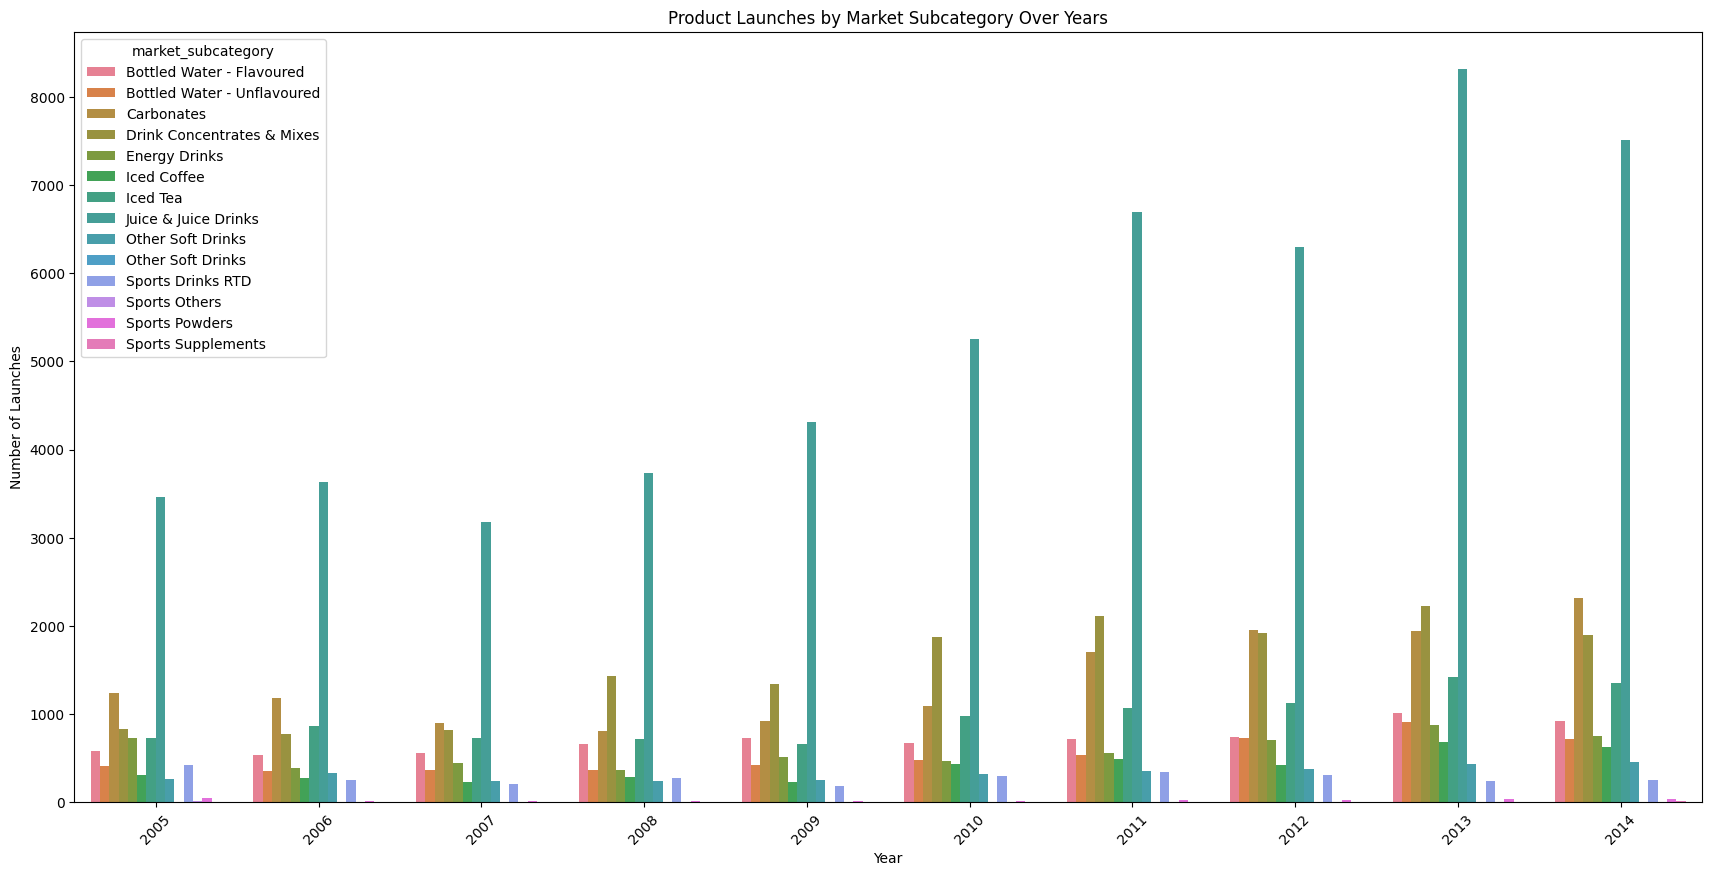

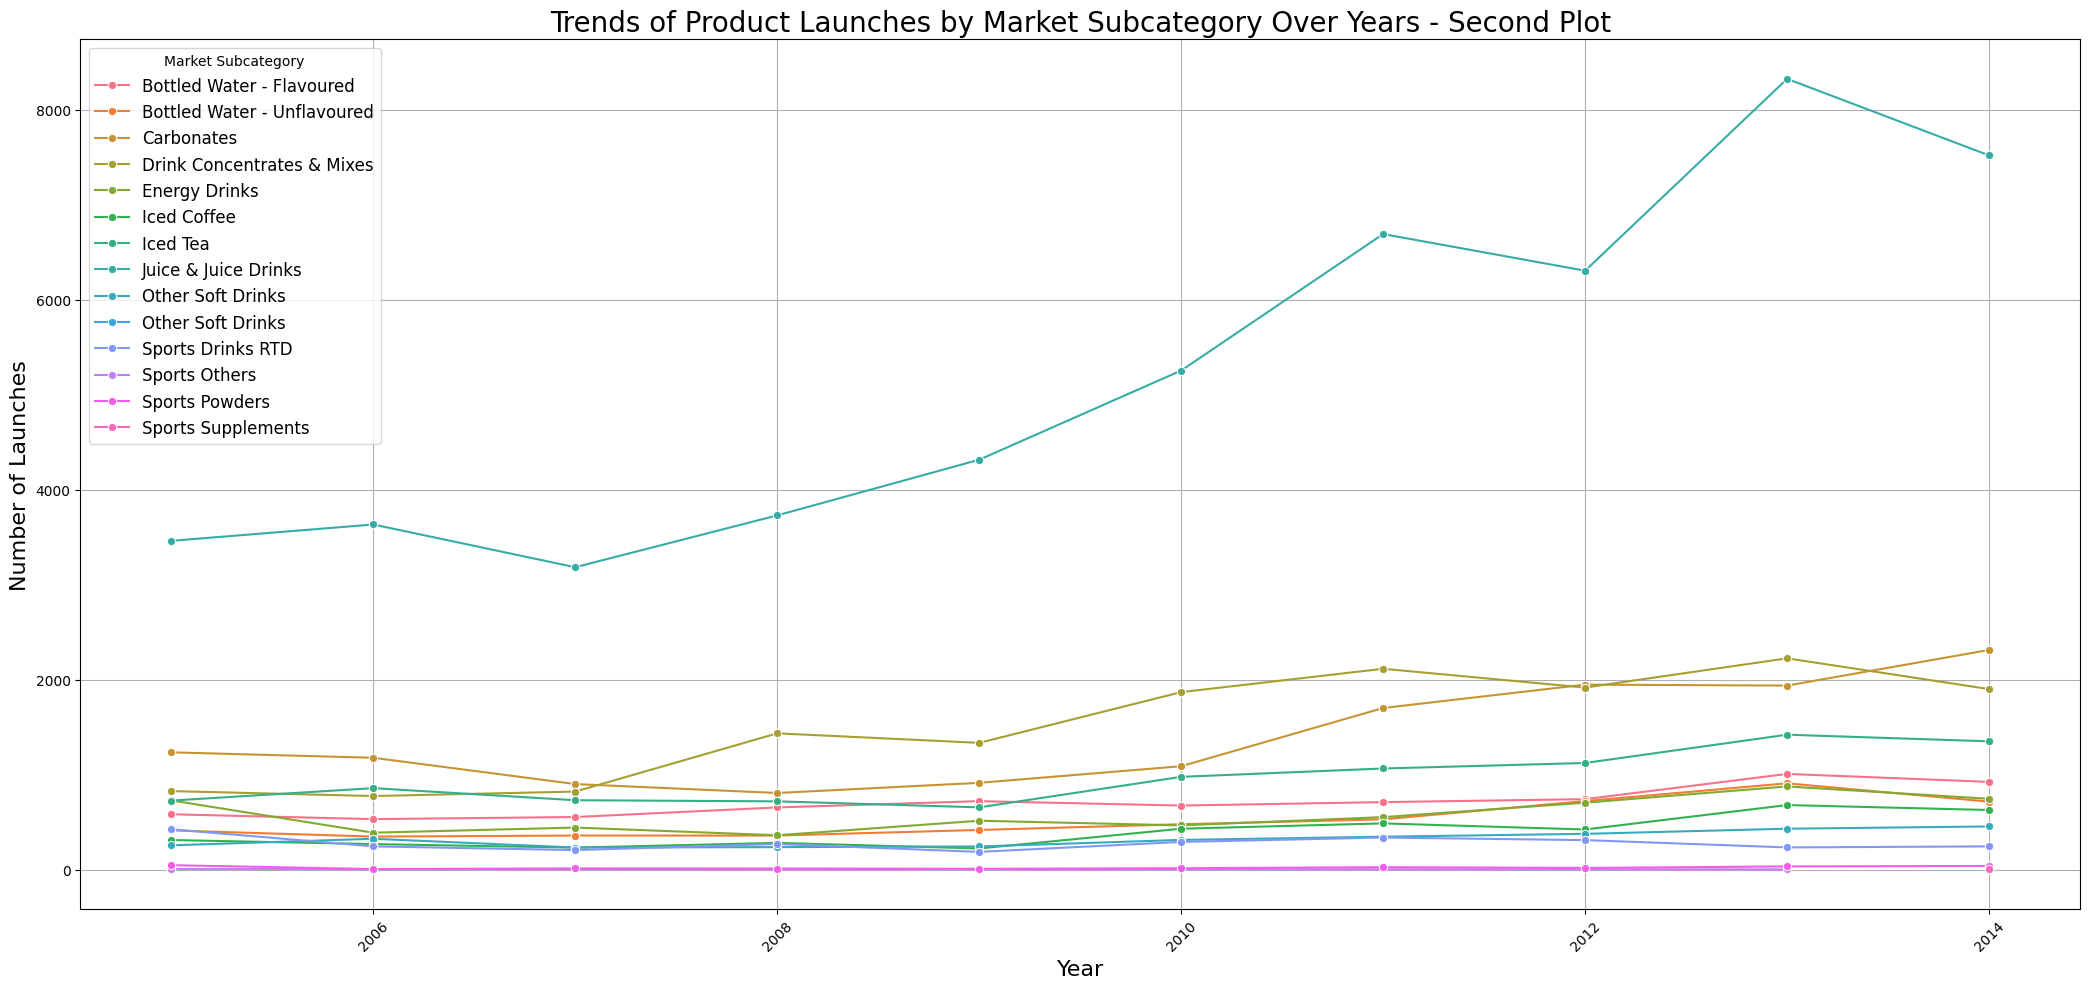

In [104]:
launch_product_2['eventdate'] = pd.to_datetime(launch_product_2['eventdate'], format= '%d-%m-%Y')
launch_product_2['year'] = launch_product_2['eventdate'].dt.year

# group by "market subcategories" and "year"
market_trends = launch_product_2.groupby(['market_subcategory', 'year']).size().reset_index(name= 'count')


print(market_trends)

# Step 1: Set up the plot
plt.figure(figsize=(21, 10))


sns.barplot(x='year', y='count', hue='market_subcategory', data=market_trends)
plt.title('Product Launches by Market Subcategory Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(21, 10))  # Start a new figure for the second plot
sns.lineplot(data=market_trends, x='year', y='count', hue='market_subcategory', marker='o')
plt.title('Trends of Product Launches by Market Subcategory Over Years - Second Plot', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Launches', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Market Subcategory', fontsize=12)
plt.grid(visible=True)
plt.tight_layout()
plt.show() 




1. Over the years , product launches in "sports drink category" is less and decreasing or showing constant trend.
From 2005 to 2009 - constant trend is shown.
From 2009 to 2010 - number of launches has increased by only 100-200
From 2010 to 2014 - Negative trend is shown (Number of launches decreased or remain same)
2. "carbonated drinks"
From 2005 to 2008 - lauches has decreased by 50-80 in comparison to each previous year

<span style="color:red">Which market subcategory has highest unique flavors? </span>

In [105]:
unique_flavors_count = launch_product_2.groupby('market_subcategory')['flavor'].nunique()

# Step 2: Find the market subcategory with the highest number of unique flavors
max_unique_flavors = unique_flavors_count.idxmax()
highest_flavor_count = unique_flavors_count.max()

# Output the result
print(f"The market subcategory with the highest unique flavors is '{max_unique_flavors}' with {highest_flavor_count} unique flavors.")

The market subcategory with the highest unique flavors is 'Juice & Juice Drinks' with 5271 unique flavors.


# Data Exploration: Merging and Manipulating Datasets 

<span style="color:red"> Could you use this Flavor Group data together with the Product Launch data and reveal 
some insights on the number of product launches over different quarters for “fruit” 
Flavor? </span>

In [106]:
unique_flavor = pd.read_csv("Flavor Classification Dataset.csv",encoding='ISO-8859-1')

unique_flavor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Flavor_Group  1445 non-null   object
 1   flavor        1445 non-null   object
dtypes: object(2)
memory usage: 22.7+ KB


In [107]:
# Step 1: Create a copy of launch_product and explode the 'flavor' column
launch_product_exploded = launch_product_2.copy()  # Create a copy
launch_product_exploded['flavor'] = launch_product_exploded['flavor'].str.split('; ')  
launch_product_exploded = launch_product_exploded.explode('flavor')

unique_flavor['flavor'] = unique_flavor['flavor'].str.lower().str.strip()
# merge the dataframe
merged_df = unique_flavor.merge(launch_product_exploded, on='flavor', how='right')

# Display the merged DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173820 entries, 0 to 173819
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Flavor_Group        171625 non-null  object        
 1   flavor              173820 non-null  object        
 2   market_subcategory  173820 non-null  object        
 3   id                  173820 non-null  object        
 4   eventdate           173820 non-null  datetime64[ns]
 5   country             173820 non-null  object        
 6   positioning         167988 non-null  object        
 7   region              173820 non-null  object        
 8   year                173820 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(7)
memory usage: 11.3+ MB


C:\Users\kumkum.gupta\AppData\Local\Temp\ipykernel_15356\434292978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fruit_launches['quarter'] = pd.to_datetime(fruit_launches["eventdate"]).dt.quarter


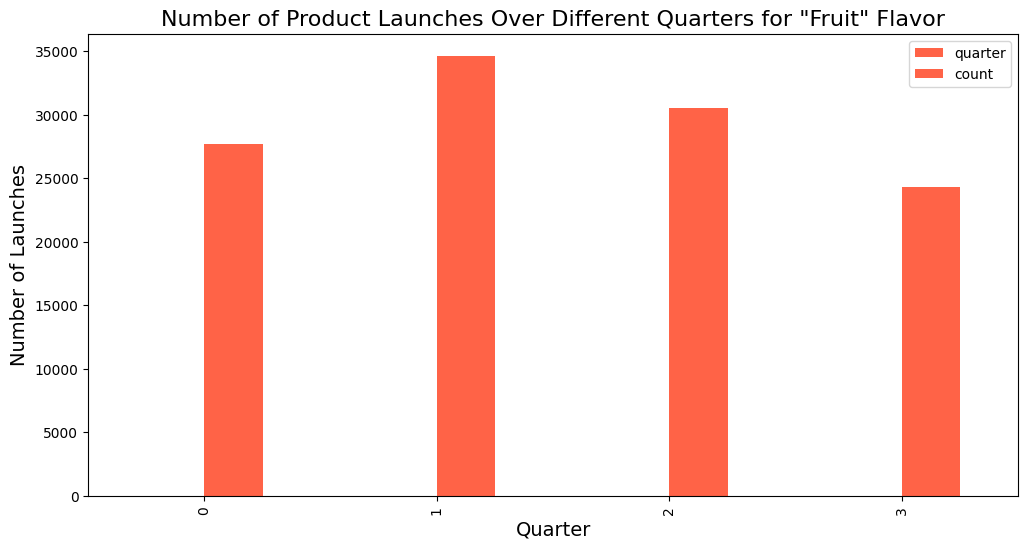

In [108]:
# bar plot for better analysis over the quarters
merged_df['eventdate'] = merged_df['eventdate'].astype('datetime64[ns]')


fruit_launches = merged_df[merged_df['Flavor_Group'] == 'Fruit']

# Step 2: Extract year and quarter
# fruit_launches['year'] = fruit_launches['eventdate'].dt.year
fruit_launches['quarter'] = pd.to_datetime(fruit_launches["eventdate"]).dt.quarter
fruit_launches.head(30)
# Step 3: Group by year and quarter and count launches
quarterly_launches = fruit_launches.groupby(['quarter']).size().reset_index(name='count')
quarterly_launches.head()

# Step 4: Visualize the results
quarterly_launches.plot(kind='bar', color='#FF6347', figsize=(12,6))
plt.title('Number of Product Launches Over Different Quarters for "Fruit" Flavor', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.show()

#  Data Formatting, Merging and Manipulating Datasets

In [109]:
positioning_mapping_df = pd.read_csv("Positioning Category Mapping Dataset.csv", encoding='ISO-8859-1')


C:\Users\kumkum.gupta\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


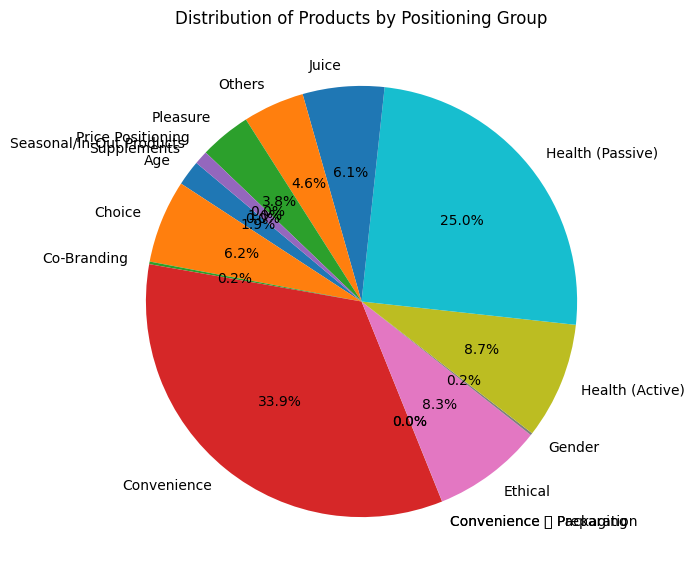

In [110]:
# Define the filter categories
filter_category = ['Convenience', 'Convenience - Packaging', 'Convenience - Preparation', 'Ethical']


# Expand the 'positioning' column (split the multiple category)
expanded_df = launch_product_2.assign(positioning=launch_product_2['positioning'].str.split(',')).explode('positioning')

# Clean up the positioning values (e.g., strip whitespace)
expanded_df['positioning'] = expanded_df['positioning'].str.strip()
#expanded_df.info()

# Merge the datasets on the appropriate columns
merged_positioning_df = pd.merge(expanded_df, positioning_mapping_df, 
                        left_on='positioning', right_on='Positioning Subcategory', how='left')
# merged_positioning_df.tail(30)     
total_products =  merged_positioning_df.groupby('Positioning Group')['id'].nunique()
# total_products.to_csv('positioning distribution.csv')
# # Filter for the desired Positioning Groups
# filtered_counts = merged_positioning_df[merged_positioning_df['Positioning Group'].isin(filter_category)]
# filtered_counts.tail(30)
# # Count the occurrences of each Positioning Group in the filtered DataFrame

# count_results = filtered_counts.groupby('Positioning Group')['id'].nunique()

# # Print the results
# print("Counts for each Positioning Group:")
# print(count_results)

# grouped_df = merged_positioning_df.groupby('id').agg({
#     'Positioning Group': lambda x: ', '.join(x.unique()),  # Join unique Positioning Groups
#     'positioning': lambda x: ', '.join(x.unique())  # Join unique positioning categories
# }).reset_index()

# Plotting the pie chart
plt.figure(figsize=(10, 7))  # Set the figure size
plt.pie(total_products, labels=total_products.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products by Positioning Group')
plt.show()

In [111]:
merged_positioning_df.tail(30)   


,market_subcategory,id,eventdate,country,positioning,region,flavor,year,Positioning Group,Positioning Subcategory
349258,Juice & Juice Drinks,114682,2014-12-01,United States,No Additives/Preservatives,North America,mango,2014,Health (Passive),No Additives/Preservatives
349259,Carbonates,114683,2012-01-01,United States,Low Calorie,North America,"cherry, not specified",2012,Health (Passive),Low Calorie
349260,Carbonates,114683,2012-01-01,United States,Convenience - Consumption,North America,"cherry, not specified",2012,Convenience,Convenience - Consumption
349261,Bottled Water - Flavoured,114684,2014-10-01,United States,Low Calorie,North America,"berry, cranberry; raspberry, not specified",2014,Health (Passive),Low Calorie
349262,Bottled Water - Flavoured,114684,2014-10-01,United States,Ethical - Packaging,North America,"berry, cranberry; raspberry, not specified",2014,Ethical,Ethical - Packaging
349263,Bottled Water - Flavoured,114684,2014-10-01,United States,Convenience - Consumption,North America,"berry, cranberry; raspberry, not specified",2014,Convenience,Convenience - Consumption
349264,Bottled Water - Flavoured,114684,2014-10-01,United States,GMO Free,North America,"berry, cranberry; raspberry, not specified",2014,Choice,GMO Free
349265,Other Soft Drinks,114685,2014-10-01,United States,Low Calorie,North America,"berry, wildberry",2014,Health (Passive),Low Calorie
349266,Other Soft Drinks,114685,2014-10-01,United States,Energy/Alertness,North America,"berry, wildberry",2014,Health (Active),Energy/Alertness
349267,Other Soft Drinks,114685,2014-10-01,United States,Ethical - Packaging,North America,"berry, wildberry",2014,Ethical,Ethical - Packaging


**Approach**: There are overlapes and multiple counts of an product because each product may contain more than one positioning group so , we are counting how many products coming under each Positioning Group , does not mean each and every count of product implies a unique product.

eg: prodct id = 3 has three positioning Group (Juice , Convenience, Health(Passive)) so each group is having count of product 3

**Inference**:  total products = 114689 

# Data Aggregation 

In [112]:
launch_product_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119501 entries, 0 to 114688
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   market_subcategory  119501 non-null  object        
 1   id                  119501 non-null  object        
 2   eventdate           119501 non-null  datetime64[ns]
 3   country             119501 non-null  object        
 4   positioning         114989 non-null  object        
 5   region              119501 non-null  object        
 6   flavor              119501 non-null  object        
 7   year                119501 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 7.7+ MB


In [113]:
# launch_product_2.to_excel('new_product_launch.xlsx')

In [114]:
# create new DF for Q4
# launch_product_4 = launch_product_2.copy()

# # new col for year, month , quarter
# launch_product_4['month'] = launch_product_4['eventdate'].dt.month
# launch_product_4['quarter'] = launch_product_4['eventdate'].dt.quarter

# yearly_summary = launch_product_4.groupby('year').size().reset_index(name='Product_Launches')
# quarterly_summary = launch_product_4.groupby(['year', 'quarter']).size().reset_index(name='Product_Launches')
# monthly_summary = launch_product_4.groupby(['year', 'month']).size().reset_index(name='Product_Launches')

# with pd.ExcelWriter('Product_Launch_Summary.xlsx', engine='xlsxwriter') as writer:
#     yearly_summary.to_excel(writer, sheet_name='yearly Summary', index=False)
#     quarterly_summary.to_excel(writer, sheet_name='quarterly Summary', index=False)
#     monthly_summary.to_excel(writer, sheet_name='monthly Summary', index=False)


# Data Exploration: Filtering and Subsetting


In [115]:
merged_positioning_df.head(5)

,market_subcategory,id,eventdate,country,positioning,region,flavor,year,Positioning Group,Positioning Subcategory
0,Other Soft Drinks,1,2005-01-01,Netherlands,Low Calorie,West Europe,"fruit, not specified; herbs, not specified",2005,Health (Passive),Low Calorie
1,Other Soft Drinks,1,2005-01-01,Netherlands,Natural,West Europe,"fruit, not specified; herbs, not specified",2005,Health (Passive),Natural
2,Carbonates,2,2005-01-01,Ireland,Convenience - Consumption,West Europe,"fruit, not specified",2005,Convenience,Convenience - Consumption
3,Juice & Juice Drinks,3,2005-01-01,Ireland,100% Not from Concentrate,West Europe,ginger; honey; lemon,2005,Juice,100% Not from Concentrate
4,Juice & Juice Drinks,3,2005-01-01,Ireland,Convenience - Consumption,West Europe,ginger; honey; lemon,2005,Convenience,Convenience - Consumption


In [116]:
merged_positioning_df.info()

merged_positioning_df['eventdate'] = pd.to_datetime(merged_positioning_df['eventdate'])

# Filter data for Canada, Year 2013, Product Type "Energy Drink", and Positioning Group "Ethical Packaging"
canada_2013_energy_ethical = merged_positioning_df[
    (merged_positioning_df['country'] == 'Canada') &
    (merged_positioning_df['eventdate'].dt.year == 2013) &
    (merged_positioning_df['market_subcategory'] == 'Energy Drinks') &
    (merged_positioning_df['Positioning Subcategory'] == 'Ethical - Packaging')
].reset_index()

# Display the filtered data
# print(canada_2013_energy_ethical)
canada_2013_energy_ethical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349288 entries, 0 to 349287
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   market_subcategory       349288 non-null  object        
 1   id                       349288 non-null  object        
 2   eventdate                349288 non-null  datetime64[ns]
 3   country                  349288 non-null  object        
 4   positioning              344776 non-null  object        
 5   region                   349288 non-null  object        
 6   flavor                   349288 non-null  object        
 7   year                     349288 non-null  int32         
 8   Positioning Group        309621 non-null  object        
 9   Positioning Subcategory  309621 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 25.3+ MB


,index,market_subcategory,id,eventdate,country,positioning,region,flavor,year,Positioning Group,Positioning Subcategory
0,241914,Energy Drinks,82405,2013-11-01,Canada,Ethical - Packaging,North America,"berry, not specified; tea, green; tea, mate",2013,Ethical,Ethical - Packaging
1,241919,Energy Drinks,82406,2013-11-01,Canada,Ethical - Packaging,North America,"citrus, not specified",2013,Ethical,Ethical - Packaging
2,242023,Energy Drinks,82440,2013-11-01,Canada,Ethical - Packaging,North America,"cherry, not specified",2013,Ethical,Ethical - Packaging
3,242027,Energy Drinks,82441,2013-11-01,Canada,Ethical - Packaging,North America,"berry, mixed",2013,Ethical,Ethical - Packaging


In [117]:


merged_positioning = merged_positioning_df[ merged_positioning_df['year'] == 2013 ]

top_flavors = merged_positioning['flavor'].value_counts()
top_flavors = top_flavors.head(5).index.tolist()
print("The top 5 unique flavors across countries in 2013:",top_flavors)

The top 5 unique flavors across countries in 2013: ['orange, not specified', 'unflavored', 'apple, red', 'fruit, not specified', 'lemon']


In [118]:
merged_positioning_df.head()

,market_subcategory,id,eventdate,country,positioning,region,flavor,year,Positioning Group,Positioning Subcategory
0,Other Soft Drinks,1,2005-01-01,Netherlands,Low Calorie,West Europe,"fruit, not specified; herbs, not specified",2005,Health (Passive),Low Calorie
1,Other Soft Drinks,1,2005-01-01,Netherlands,Natural,West Europe,"fruit, not specified; herbs, not specified",2005,Health (Passive),Natural
2,Carbonates,2,2005-01-01,Ireland,Convenience - Consumption,West Europe,"fruit, not specified",2005,Convenience,Convenience - Consumption
3,Juice & Juice Drinks,3,2005-01-01,Ireland,100% Not from Concentrate,West Europe,ginger; honey; lemon,2005,Juice,100% Not from Concentrate
4,Juice & Juice Drinks,3,2005-01-01,Ireland,Convenience - Consumption,West Europe,ginger; honey; lemon,2005,Convenience,Convenience - Consumption


# Hypothesis Testing: TOP 5 Positioning Groups

<span style="color:red">The client is interested in determining TOP 5 popular positioning categories (groups) 
across countries in 2013. Define the Top 5 based on total product launches.</span>

In [121]:
top_positioning_cat = merged_positioning_df[merged_positioning_df['year']== 2013].groupby('Positioning Group')['id'].nunique()
top_5_positioning_cat = top_positioning_cat.sort_values(ascending=False).head(5)

# Display the top 5 positioning categories
print(top_5_positioning_cat)

Positioning Group
Convenience         12986
Health (Passive)     9858
Ethical              5981
Choice               2958
Health (Active)      2648
Name: id, dtype: int64
